# Linear Regression: Pt5

In this Jupyter notebook we're going to:
    1. Look at improving the performance of our existing model by adding more features
    2. Look at a couple of different ways of plotting the residuals
    
    
User Guide for the dataset is available here: https://scikit-learn.org/stable/datasets/index.html#boston-dataset    

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
boston = load_boston()
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_df['MEDV'] = boston['target']

In [2]:
X = boston_df[[x for x in boston_df.columns if x != 'MEDV']]
y = boston_df[['MEDV']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Baseline LR with single variable

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression().fit(X_train[['RM']], y_train)
r2_score_test = model.score(X_test[['RM']], y_test)
y_hat_test = model.predict(X_test[['RM']])
mae_test = mean_absolute_error(y_test, y_hat_test)
print("r2 score: {:.3f}".format(r2_score_test))
print("MAE: {:.2f}".format(mae_test*1000))

r2 score: 0.371
MAE: 4478.34


### Plot of regression line

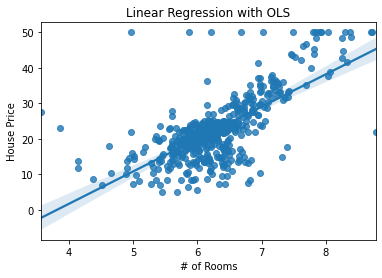

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.regplot(x="RM", y="MEDV", data=boston_df)
ax.set_title("Linear Regression with OLS")
ax.set_xlabel("# of Rooms")
_ = ax.set_ylabel("House Price")

### Plot of residuals

In [5]:
def plot_residuals(y, yhat):
    
    fig, ax = plt.subplots(figsize=(9,3))
    residuals = y - yhat
    ax.scatter(residuals, yhat)
    plt.title("Residual Plot")
    plt.xlabel('Residual')
    plt.ylabel('Predicted value of Y')
    plt.show()

    residuals = y - yhat
    residuals.hist(bins = 10)
    plt.title('Histogram of prediction errors')
    plt.xlabel('Prediction error')
    plt.ylabel('Frequency')
    
    

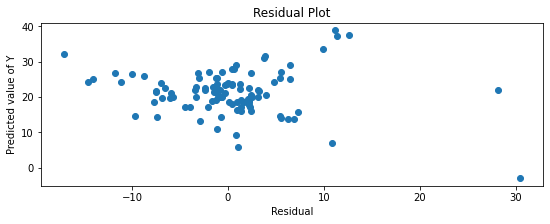

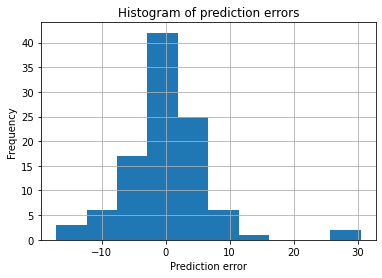

In [6]:
plot_residuals(y_test, y_hat_test)

### Plot Predicted against Actual

In [7]:
def plot_predicted_against_actual(y, yhat):
    
    fig, ax = plt.subplots(figsize=(9, 3))
    ax.scatter(y, yhat)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], c = 'red')
    plt.title("Predicted against Actual")    
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
 
    fig, ax = plt.subplots(figsize=(9, 3))
    ax.scatter(x = range(0, y_test.size), y=y, label = 'Actual')
    ax.scatter(x = range(0, y_hat_test.size), y=yhat, c = 'orange', label = 'Predicted',)
    plt.legend()
    plt.title('Actual and predicted values')
    plt.ylabel('House Price')
   

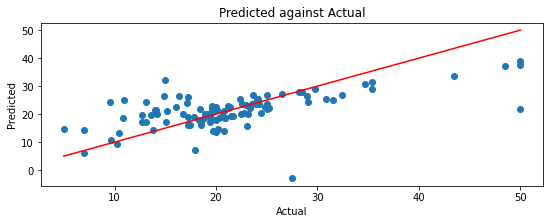

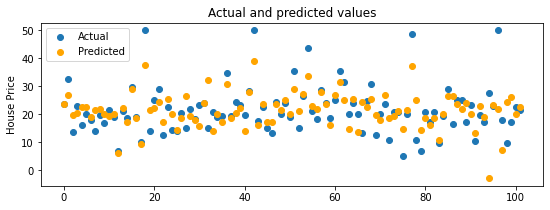

In [8]:
plot_predicted_against_actual(y_test, y_hat_test) 

### Analysis of Baseline Model

Some observations on our baseline model:
1. Appears to show a linear relationship between # of Rooms and House Price
2. Has quite a high MAE of 4.4K on test set. And an r2 of 0.371
3. Residual plot appears to indicate some heteroscedacity.
4. The linear model will predict a value of < 0$ where the # of rooms is < 4 !

## Multivariable Linear Regression

In [9]:
from sklearn.metrics import r2_score

other_cols = ['RM', 'CRIM', 'NOX', 'DIS', 'LSTAT', 'RAD']
model = LinearRegression().fit(X_train[other_cols], y_train)
y_hat_test = model.predict(X_test[other_cols])

r2_score_test = r2_score(y_test, y_hat_test)
mae_test = mean_absolute_error(y_test, y_hat_test)
print("r2 score: {:.3f}".format(r2_score_test))
print("MAE: {:.2f}".format(mae_test*1000))

r2 score: 0.565
MAE: 3986.32


### Residual Plot

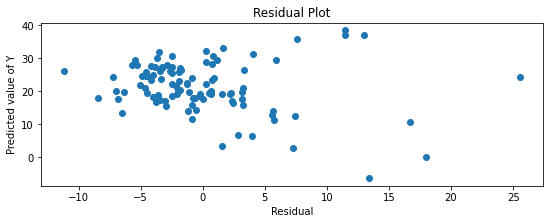

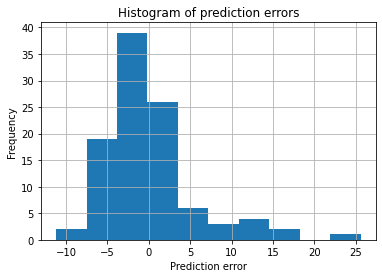

In [10]:
plot_residuals(y_test, y_hat_test)

### Plot Predicted against Actual

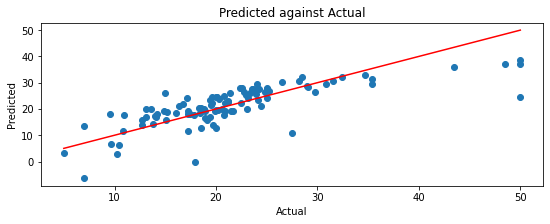

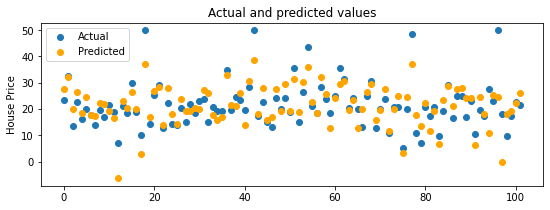

In [11]:
plot_predicted_against_actual(y_test, y_hat_test)

## All the columns

In [12]:
model = LinearRegression().fit(X_train, y_train)
y_hat_test = model.predict(X_test)

r2_score_test = r2_score(y_test, y_hat_test)
mae_test = mean_absolute_error(y_test, y_hat_test)
print("r2 score: {:.3f}".format(r2_score_test))
print("MAE: {:.2f}".format(mae_test*1000))

r2 score: 0.669
MAE: 3189.09


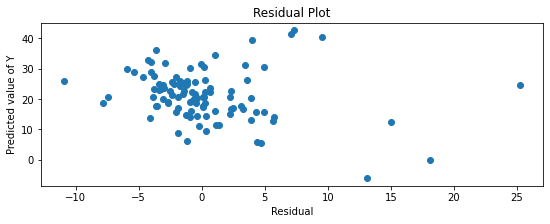

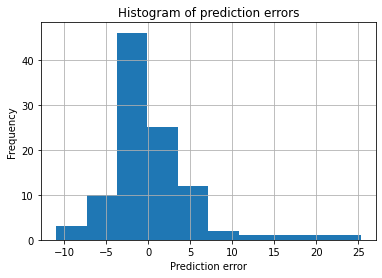

In [13]:
plot_residuals(y_test, y_hat_test)

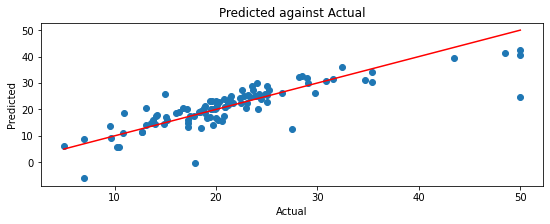

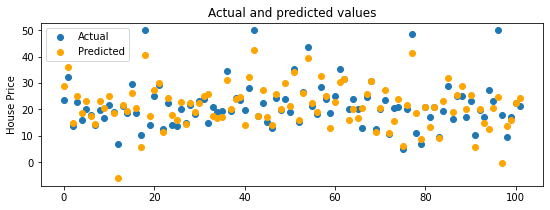

In [14]:
plot_predicted_against_actual(y_test, y_hat_test)